In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [15]:
data = pd.read_csv('Data/sign_mnist_train.csv')
test = pd.read_csv('Data/sign_mnist_train.csv')

In [44]:
y_train = data['label']
y_test = test['label']
X_train = data.drop('label', axis=1).values
X_test = test.drop('label', axis=1).values

In [45]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [46]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [47]:
X_train = X_train / 255
X_test = X_test / 255

In [48]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = X_train.reshape(-1,28,28,1)
x_test = X_test.reshape(-1,28,28,1)

In [49]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [50]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [51]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 75)        750       
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 75)       300       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 75)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 14, 14, 50)      

In [52]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

Epoch 1/20
215/215 [==============================] - 73s 337ms/step - loss: 1.0565 - accuracy: 0.6653 - val_loss: 4.1154 - val_accuracy: 0.0463 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 66s 306ms/step - loss: 0.2129 - accuracy: 0.9295 - val_loss: 1.2244 - val_accuracy: 0.5740 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 66s 309ms/step - loss: 0.1036 - accuracy: 0.9669 - val_loss: 0.1785 - val_accuracy: 0.9425 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 72s 334ms/step - loss: 0.0630 - accuracy: 0.9803 - val_loss: 0.0147 - val_accuracy: 0.9962 - lr: 0.0010
Epoch 5/20
 59/215 [=======>......................] - ETA: 42s - loss: 0.0448 - accuracy: 0.9857

KeyboardInterrupt: 

In [60]:
predictions = model.predict(x_test[:10])

In [66]:
import numpy as np
for i, n in zip(predictions, y_test):
    print(np.where(i == np.amax(i)), np.where(n == np.amax(n)))

(array([3], dtype=int64),) (array([3], dtype=int64),)
(array([6], dtype=int64),) (array([6], dtype=int64),)
(array([2], dtype=int64),) (array([2], dtype=int64),)
(array([2], dtype=int64),) (array([2], dtype=int64),)
(array([12], dtype=int64),) (array([12], dtype=int64),)
(array([15], dtype=int64),) (array([15], dtype=int64),)
(array([8], dtype=int64),) (array([8], dtype=int64),)
(array([21], dtype=int64),) (array([21], dtype=int64),)
(array([3], dtype=int64),) (array([3], dtype=int64),)
(array([3], dtype=int64),) (array([3], dtype=int64),)


In [ ]:
model.save('Model')

In [2]:
from tensorflow import keras

In [3]:
model = keras.models.load_model('Model')

In [4]:
model

In [5]:
import pandas as pd

In [6]:
test = pd.read_csv('Data/sign_mnist_test.csv')

In [7]:
y_test = test['label']
X_test = test.drop('label', axis=1).values

In [8]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_test = label_binarizer.fit_transform(y_test)

In [9]:
X_test = X_test / 255

In [10]:
predictions = model.predict(X_test[:10].reshape(10, 28, 28, 1))

In [11]:
import numpy as np
for i, n in zip(predictions, y_test):
    print(np.where(i == np.amax(i)), np.where(n == np.amax(n)))

(array([6], dtype=int64),) (array([6], dtype=int64),)
(array([5], dtype=int64),) (array([5], dtype=int64),)
(array([9], dtype=int64),) (array([9], dtype=int64),)
(array([0], dtype=int64),) (array([0], dtype=int64),)
(array([3], dtype=int64),) (array([3], dtype=int64),)
(array([20], dtype=int64),) (array([20], dtype=int64),)
(array([9], dtype=int64),) (array([9], dtype=int64),)
(array([13], dtype=int64),) (array([13], dtype=int64),)
(array([3], dtype=int64),) (array([3], dtype=int64),)
(array([7], dtype=int64),) (array([7], dtype=int64),)


In [12]:
import cv2

In [13]:
# Real Images/WIN_20220411_13_30_06_Pro.jpg
# Real Images/WIN_20220411_13_30_09_Pro.jpg
# Real Images/WIN_20220411_13_30_14_Pro.jpg
# Real Images/WIN_20220411_13_30_17_Pro.jpg

In [14]:
""" Predicting the real image """
image = cv2.imread("Real Images/WIN_20220411_13_30_17_Pro.jpg", cv2.IMREAD_GRAYSCALE)
# image = image_resize(image, 28, 28)
x = image/255.0
x = np.expand_dims(x, axis=-1)
x = np.expand_dims(x, axis=0)
    
""" Predicting """
y_pred = model.predict(x)[0]
y_pred

ValueError: in user code:

    File "C:\Users\kenzh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\kenzh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\kenzh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\kenzh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "C:\Users\kenzh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\kenzh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 720, 1280, 1)


In [ ]:
np.where(y_pred == np.amax(y_pred))

In [ ]:
y_pred[7]

In [ ]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

In [ ]:
image.shape

In [15]:
image2 = np.resize(image, (28, 28))
image2.shape

(28, 28)

In [17]:
import matplotlib.pyplot as plt

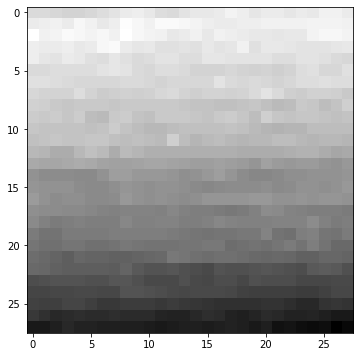

In [19]:
plt.figure(figsize=(6, 6))
plt.imshow(image2, cmap='gray')

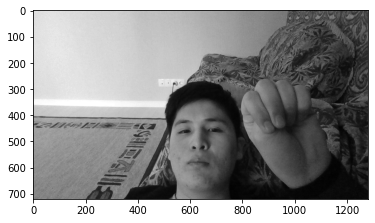

In [20]:
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')